# Binary Classifier

In [1]:
#This code mimicks the fetch_openml function from sklearn.datasets as used in the textbook, 

from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.utils import Bunch

# Load the MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine training and test sets
X = np.vstack([x_train, x_test])  # Combine image data
y = np.hstack([y_train, y_test])  # Combine labels

# Flatten 28x28 images to 1D arrays (784 features)
X = X.reshape(X.shape[0], -1)

# Convert data to float32 (to match fetch_openml)
X = X.astype('float32')

# Mimic fetch_openml's return format using a Bunch
mnist = Bunch(data=X, target=y)
#This is the same as the textbook, but the data is now in the same format as the MNIST dataset from TensorFlow.
# Access features and target as in the textbook
X, y = mnist.data, mnist.target
#There are 70,000 images each with 784 features which represents the 28 x 28 pixels. 
print("Features (X) shape:", X.shape)  # (70000, 784)
#Labels contain a single value for each image, indicating it's class. No columns as it is not a multi-dimensional array.
print("Labels (y) shape:", y.shape)    # (70000,)


Features (X) shape: (70000, 784)
Labels (y) shape: (70000,)


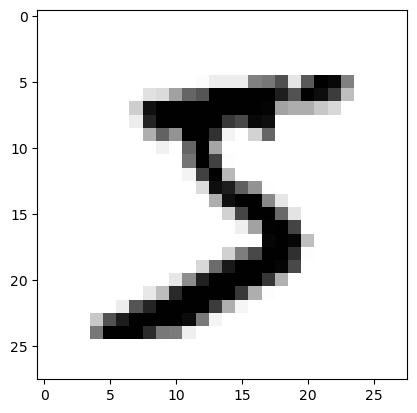

5

In [2]:
#To look at one digit from the dataset, we need to grab an instance's feature vector, reshape it to the 28x28 array, and display
#it using matplotlib imshow() function. We use cmap_'binary' as an argument to make a greyscale color ma where 0 is white and 255 is black

import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap= "binary")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

y[0]
#This is the label for the first image in the dataset. 

In [3]:
#This step splits the dataset into training and test sets, with the training set containing 60,000 images 
# and the test set containing 10,000 images.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
#Training a binary classifier to identify a single digit, say 5, we need to create a target vector for this classification task.
#This first step creates the target vectors for our classification task
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Check unique values in y_train_5
print("Unique values in y_train_5:", set(y_train_5))

print("Unique values in y_train:", set(y_train))


Unique values in y_train_5: {False, True}
Unique values in y_train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [5]:
#Now we have to pick a classifier and train it. In this example we use stochastic gradient descent (SGD)
#We do this by using Scikit_Learn's SGDClassifier, which can handle very large datasets efficiently
#SGD is well suited for online learning, in this case we create a SGD classifier and train it on the whole training set

from sklearn.linear_model import SGDClassifier
#SGD is a linear classification model that uses SGD as its optimization method. SGD is an optimizer that
#can be used for other models such as neural networks, it minimizes the loss function of the model
#Here we assign the variable sgd_clf to this SGDClassifier we create, we can then call methods on this var to train the model
sgd_clf = SGDClassifier(random_state = 42)
#X_train still represents the features (pixel data of images) regardless of whether you're performing binary or 
#multiclass classification
#model learns patterns in X_train to predict whether the corresponding label in y_train_5 is True or false
#y_train_5 is a modified version of y_train labels where it contains true or false if it is 5 or not.
sgd_clf.fit (X_train, y_train_5)
#we feed the argument of the image of digit 5, the classifier guesses the image represents a 5 (true)
sgd_clf.predict([some_digit])



array([ True])

In [6]:
#The next step is evaluating model performance, one way is to use cross_validation
#we can use cross_val_score() to evaluate our SGDClassifier model using k-fold cross falidation with 3 folds
#Recall, k-fold cross validation means splitting training set into k folds, then training the modle k times, holding
#a different fold each time for evaluation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

#Output shows accuracy (ratio of correct predictions) for the 3 folds


array([0.9353 , 0.9632 , 0.94965])

In [7]:
#The results look good, but what if we compare them to a dummyclassifer that just classifies all images to the most frequent class
#In this case it would be negative class (not 5)

from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) #always gives false

#evaluating this model's performance

cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

False


array([0.90965, 0.90965, 0.90965])

In [8]:
#Results of dummyclassifier show it doesn't perform much worse than our model when using accuracy as the scoring mechanism
#Generally, accuracy is not a preferred performance measure for classifiers especially when dealing with skewed datasets
#E.g in our case some classes are more frequent than others (false more common than true), a better method is using a confusion matrix

#General idea is to count the number of instances where class A are classified as class B, for all A/B pairs
#E.g, to know the number of times the classifier confused images of 8s with 0s, you look at row 8, column 0 of the matrix
#To compute, we first need a set of predictions to be compared to actual targets using cross_val_predict() function

from sklearn.model_selection import cross_val_predict

#this function performs k-fold cross-validation, but instead of returning the evaluation scores, it returns the predicitons made on each test fold. 
#meaning the model makes predictions on data it never saw during training (a clean prediction)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [9]:
#We then can create the confusion matrix suing the confusion_matrix() function. We pass the target class y_train_5 and predicted
#y_train_pred to do this

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm
#Each row in the confusion matrix represents an actual class, while each column represents a predicted class. First row considers non-5 images
#of which 52533 were correctly classified as non 5s and 2046 incorrectly classfied as 5s (false positives)
# second row considers images of 5s, positive class
#of which 991 were incorrectly classified as non 5s (false negatives), and 4430 were correctly classified (true positives)

#A perfect classifier would only have true positives and true negatives, so it would have nonzero values only on 
# main diagonal of top left to bottom right



array([[52533,  2046],
       [  991,  4430]])

In [10]:
#There are alternative classifier metrics we can use to evaluate our models, such as precision and recall, which can be accessed through 
#scikitlearn using precision_score and recall_score

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) #Precision measures the accuracy of positive predictions
# In our context: Out of all images that the model predicted as 5, what fraction were actually 5s
# Precision = 4,430/(4,430 + 2046) = 0.684
# Interpretation: When your model says this is a 5, it's right about 68.4% of the time
print(recall_score(y_train_5, y_train_pred)) #Recall score measures how many actual positive cases were correctly identified
# In our context: Out of all actual 5s in the dataset, what fraction did the model correctly identify?
# Recall = 4,430/(4,430+991) = 81.7%
#Interpretation: The model correctly identifies about 81.7% of the actual 5s in the dataset

#We may also combine precision and recall into a single metric called the F1 score, which is the harmonic mean of precision and recall
#While the regular mean treats all values equally, the harmonic mean gives much more weight to lower values.
#Thus, the classifier will only get a high F1 score if both recall and precision are high.

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

#F1 score favors classifiers that have similar precision and recall, but this is not always what we want.
#For example if we trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier
#that rejects many good videos (low recall) but only keeps safe ones (high precision).
#On the other hand, a shoplifting classifier would preferably have high recall and lower precision. This means
#The security would get a few false alerts but almost all shoplifters will get caught.


0.6840642371834466
0.8171923999262128


0.7447255610658149

<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

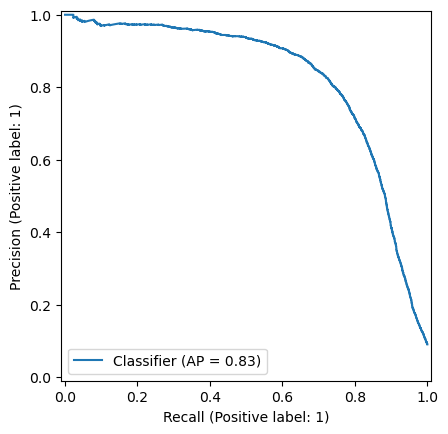

In [22]:
#Precision-Recall Curve shows the tradeoff between preicison and recall at different classification thresholds

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
#This gets the prediction scores from the model
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

#Create and plot PR curve
dispay = PrecisionRecallDisplay.from_predictions(y_train_5, y_scores)

display



0.9506700784170535

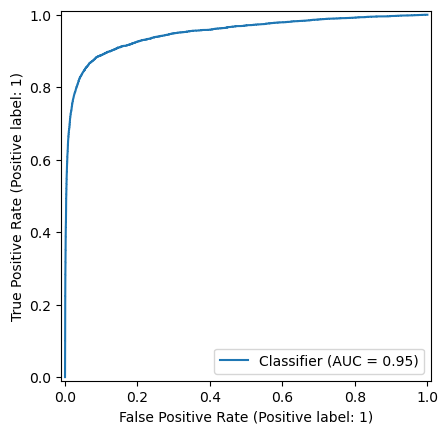

In [24]:
#ROC (Reciever Operating Characteristic) Curve shows the tradeoff between true positive rate (recall)
# and false positive rate at different thresholds
# better for balanced datasets, perfect score is top left corner (0,1)

from sklearn.metrics import RocCurveDisplay

#Create and plot ROC curve

display = RocCurveDisplay.from_predictions(y_train_5, y_scores)

#Determine the area under the curve (AUC score)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

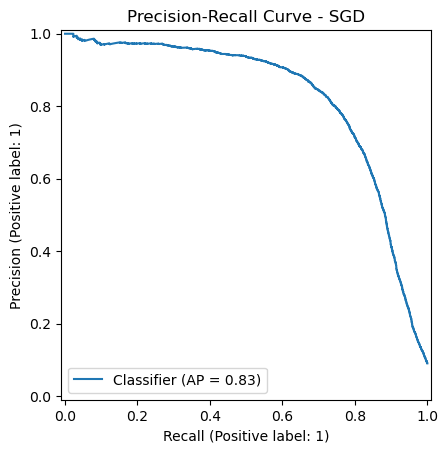

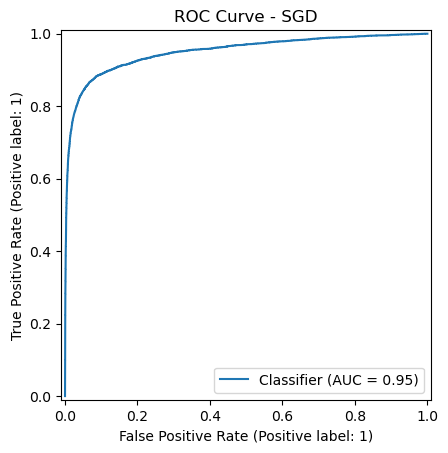

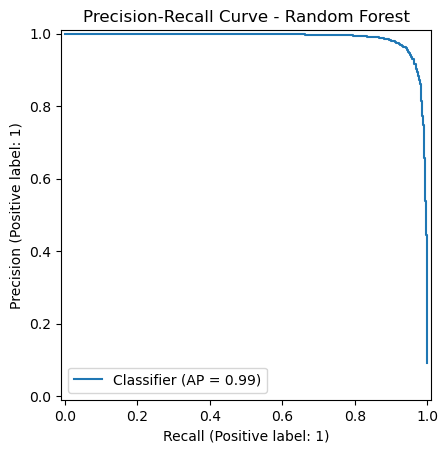

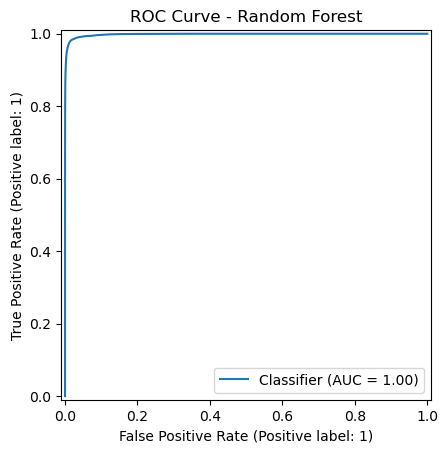

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Compare models using both curves
models = {
    "SGD": SGDClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    # Different handling for different model types
    if isinstance(model, SGDClassifier):
        y_scores = cross_val_predict(model, X_train, y_train_5, cv=3, method="decision_function")
    else:  # RandomForestClassifier
        y_scores = cross_val_predict(model, X_train, y_train_5, cv=3, method="predict_proba")[:, 1]
    
    # PR curve
    display = PrecisionRecallDisplay.from_predictions(y_train_5, y_scores)
    plt.title(f"Precision-Recall Curve - {name}")
    plt.show()
    
    # ROC curve
    display = RocCurveDisplay.from_predictions(y_train_5, y_scores)
    plt.title(f"ROC Curve - {name}")
    plt.show()

roc_auc_scores(y_train_5, y_scores)

# MultiClass Classification

In [12]:
#The next step is to move from our binary classifier (which distinguishes between two classes) to a multiclass classifier
#This is also called a multinomial classifier, and it can distinguish between more classes.
#Some scikit-learn classifiers are capable of handling multiple classes natively (LogisticRegression, RandomForestClassifier)
#Others are strictly binary classfiers (SGDClassifier and SVC)
#There are various strategies we can use to perform multiclass classification with multiple binary classfiers
#One method is to train 10 binary classifiers, one for each digit, and when classifying an image select the one with the highest score
#This is called the one-versus-the-rest (OvR) strategy, or sometimes one-versus-all (OvA)

#An alternative strategy is to train a binary classifier for each pair of digits, eg. one to distinguish 0s and 1s, 
#one of 1s and 2s,a nd so on. This is called the onve-versus-one (OvO) strategy.
#For N classes you need N x (N-1)/2 classifiers. In our case, classifiying an image means running it through all 45 classifiers
#and seeing which class wins the most duels. For algorithsm that scale poorly with the size of the training set,
#OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large
#training sets. However for most binary classification OvR/OvA is preferred.

#First let us use Scikit-learn's support vector machine classifier using sklearn.svm.SVC
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) #We use y_train and not y_train_5 as we are making a multiclass classifier
#After fitting the model to the data we want to use, we can make a prediction on an image with the variable some_digit we assigned
#in the binary classifier steps to an image of 5.
svm_clf.predict([some_digit])



array([5], dtype=uint8)

In [13]:
#The code actually made 45 predictions-one per pair of classes- and it selected the class that won the most duels.
#In this case it correctly identified the image as 5
# To see the inner workings of how this classifier made it's decision, we can use the method decision_function()

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)
#We can see that the highest score is 9.3, and this corresponds to class 5

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [14]:
#We can force SciKit-Learn to use OvO or OvR classfiers using OneVsOneClassifier or OneVsRestClassifier
#Just create an instance and pass a classifier to its constructor.

from sklearn.multiclass import OneVsRestClassifier

#This code creates a multiclass classifier using the OvR strategy, based on an SVC
ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

ovr_clf.predict([some_digit])

array([5], dtype=uint8)

# Error Analysis

In a real project, you would now follow the steps in your machine learning project chekclist (Appendix A). You'd explore data preparation options, try out multiple models, shortlist the best ones, fine-tune their hyperparameters using Grid SearchCV, and automate as much as possible. Assuming we have found a promising model, we can now find ways to improve it by analyzing the types of erros that it makes.


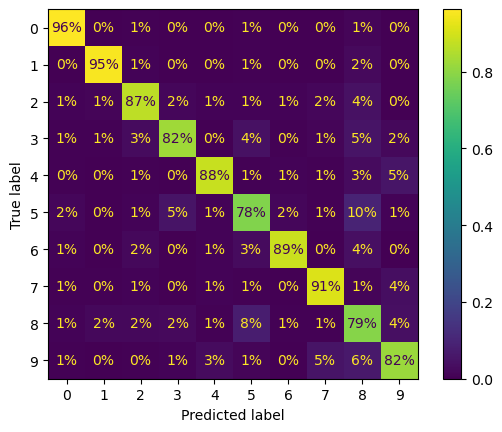

In [31]:
#We will first look at the confusion matrix, by using the cross_val_predict() function and then passing our labels 
# and predictions to the confusion_matrix() function. This worked well with our binary classifier, but for multiclass 
# classification we may want to use a colored diagram using ConfusionMatrixDisplay.from_predictions()

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, values_format=".0%")
plt.show()

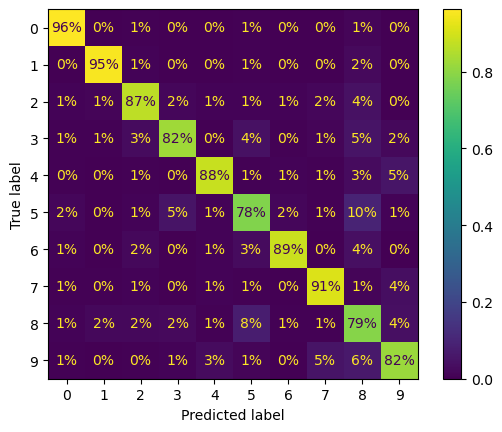

In [16]:
#To improve this matrix, we can normalise the confusion matrix by dividing each value by the total number of images in
#its true class, and then specify the values_format ".0%" argument to show percentages with no decimals

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = "true", values_format=".0%")
plt.show()

#Continue from Pg.122

# Multilabel Classification

For previous examples, each instance has always been assigned to one class. But in some cases you may want your classifier to output multiple classes for each isntance. For example a facial recognition classifier should attach one tag for each person it sees in a photo. If it has been trained to recognize three faces (Alice, Bob, and Charlie) it should return an output of True,False,True when shown a picture of just alice an charlie. These classification systems which output multiple binary tags are called multilabel classification systems.

In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) #creates a boolean array marking if a digi is >= 7 (7,8,9)
y_train_odd = (y_train.astype('int8')% 2 ==1) #creates a boolean array marking if a digit is odd (1,3,5,7,9)
y_multilabel = np.c_[y_train_large, y_train_odd] #combining these two labels using np.c_[] (column stack)
#this creates a multilabel array where each sample has two labels

knn_clf = KNeighborsClassifier() #creates Kneighborsclassifier instnace which supports multilabel classification
#and trains this model using the multiple targets array
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit]) #prediction outputs two labels, first indicating it is less than 7, second indicating it is odd


array([[False,  True]])

In [20]:
#Next step is to evaluate our multilable classifier, and one approach to this is to measure the F1 score for
#each individual label. Following code computes average F1 score across all labels

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

0.9764102655606048

Interpretation of F1 score: In our case, the classifier is predicting two different labels for each digit, whether it is large and whether the digit is odd. An F1 score of 0.976 is quite high and indicates that the classifier is performing very well at both task simultaneously. The classifier has both high precision (when it predicts a digit is large/odd it's usually correct) and high recall (it successfully identifies most of the large/odd digits). The macro average argument we include in the f1_score function means were are taking the simple average of the F1 scores across both classification task, treating them as equally important.